In [12]:
from TSP import plot_route_with_labels
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dist_central = np.loadtxt("CustDist_WHCentral.csv", skiprows=1, delimiter=",")[:,1:]
xy_central   = np.loadtxt("CustXY_WHCentral.csv", skiprows=1, delimiter=",")[:,1:].T

dist_corner  = np.loadtxt("CustDist_WHCorner.csv", skiprows=1, delimiter=",")[:,1:]
xy_corner    = np.loadtxt("CustXY_WHCorner.csv", skiprows=1, delimiter=",")[:,1:].T

orders       = np.loadtxt("CustOrd.csv", skiprows=1, delimiter=",")[:,1]

In [14]:
def heuristic(coords):
    SPLIT = 50
    order = (coords[:,0] > SPLIT) * -coords[:,1] + (coords[:,0] <= SPLIT) * (coords[:,1] -1000) 

    return np.argsort(order) + 1

In [47]:
def plot_route_with_labels(route, coords, orders, max_capacity=1000, figsize=(4, 4)):
    fig, ax = plt.subplots(ncols=1, figsize=figsize)
    arrowprops = dict(arrowstyle="->", shrinkA=2, shrinkB=7.5)
    textoptions = dict(ha="center", va="center", c="white", fontsize=10)

    ax.set(xlabel="X", ylabel="Y", xlim=(0, 100), ylim=(0, 100))
    ax.grid()
    ax.set_axisbelow(True)
    ax.scatter(coords[:, 0], coords[:, 1], marker="o",
               s=15**2, c=orders, cmap="Blues")
    ax.scatter(coords[0, 0], coords[0, 1], marker="o", s=15**2, c="red")
    # ax.plot(coords[0][0], coords[0][1], ls="", marker="o", ms=10, c="red",ec="red")

    capacity = max_capacity - orders[route[0]]
    ax.annotate("wh", xytext=coords[0], xy=coords[route[0]],
                arrowprops=arrowprops, **textoptions)

    for i, f in zip(route, route[1:]):
        if capacity < orders[f]:
            capacity = max_capacity
            ax.annotate(
                f"{i}", xytext=coords[i], xy=coords[0], arrowprops=arrowprops, **textoptions)
            ax.annotate(
                "wh", xytext=coords[0], xy=coords[f], arrowprops=arrowprops, **textoptions)
            capacity -= orders[f]
            # print("Ups, go back")
        else:
            ax.annotate(
                f"{i}", xytext=coords[i], xy=coords[f], arrowprops=arrowprops, **textoptions)
            capacity -= orders[f]

    ax.annotate(f"{f}", xytext=coords[route[-1]],
                xy=coords[0], arrowprops=arrowprops, **textoptions)


In [40]:
N = 10
route = heuristic(xy_central.T[1:N+1])
orders[4]

80.0

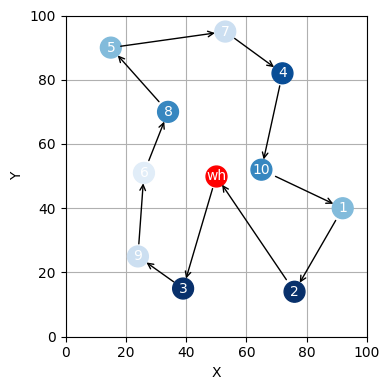

In [48]:
plot_route_with_labels(route, coords=xy_central.T[:N+1], orders=orders[:N+1])
plt.tight_layout()
plt.savefig("images/heuristic_route.pdf")

In [64]:
coords = xy_central.T[0:11]
sorted(coords.tolist(),key=lambda x: x[1]-1000 if (x[0]<=50) else -x[1]),coords

([[24.0, 25.0],
  [15.0, 39.0],
  [50.0, 50.0],
  [26.0, 51.0],
  [34.0, 70.0],
  [14.0, 76.0],
  [15.0, 90.0],
  [40.0, 92.0],
  [53.0, 95.0],
  [72.0, 82.0],
  [52.0, 65.0]],
 array([[50., 50.],
        [40., 92.],
        [14., 76.],
        [15., 39.],
        [72., 82.],
        [15., 90.],
        [26., 51.],
        [53., 95.],
        [34., 70.],
        [24., 25.],
        [52., 65.]]))

In [85]:
# coords[:,1]-1000 if (coords[:,0]<=50) else -coords[:,1]
order = (coords[:,0] >50) * -coords[:,1] + (coords[:,0] <= 50) * (coords[:,1] -1000) 
order

array([-950., -908., -924., -961.,  -82., -910., -949.,  -95., -930.,
       -975.,  -65.])

In [92]:
coords[np.argsort(order,axis=0)]

array([[24., 25.],
       [15., 39.],
       [50., 50.],
       [26., 51.],
       [34., 70.],
       [14., 76.],
       [15., 90.],
       [40., 92.],
       [53., 95.],
       [72., 82.],
       [52., 65.]])

In [29]:
coords = coords.T

In [91]:
coords[[1,0]]

array([[40., 92.],
       [50., 50.]])

In [46]:
np.argsort(coords,axis=0)

array([[ 5,  2],
       [ 9,  3],
       [ 6,  9],
       [ 8,  1],
       [ 3,  0],
       [ 0,  6],
       [ 7, 10],
       [10,  8],
       [ 4,  4],
       [ 2,  5],
       [ 1,  7]])